In [116]:
import numpy as np

# demonstration of fourier filtering of a narrow frequency range

for traditional fourier filtering, which generally removes all but a range of frequencies, see [https://terpconnect.umd.edu/~toh/spectrum/FourierFilter.html](here) (fun demo) or any signal processing text book

In [343]:
import pylab as pl
%pylab inline
plt.style.use("https://raw.githubusercontent.com/fedhere/UInotebooks/master/fbb.mplstyle")

Populating the interactive namespace from numpy and matplotlib


# create some simple signal

In [344]:
y0 = np.ones(1000) * 10

In [345]:
np.random.seed(666)
y0 = y0 + np.random.randn(1000) 


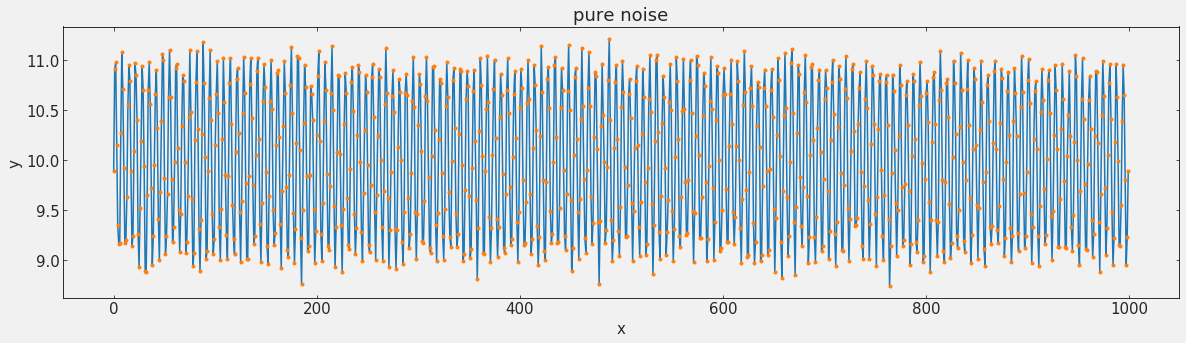

In [346]:
pl.figure(figsize=(20,5))
pl.plot(x, '-')
pl.plot(x, '.')
pl.title("pure noise")
pl.xlabel("x")
pl.ylabel("y");

# add some signal: 2 sine waves at different frequencies

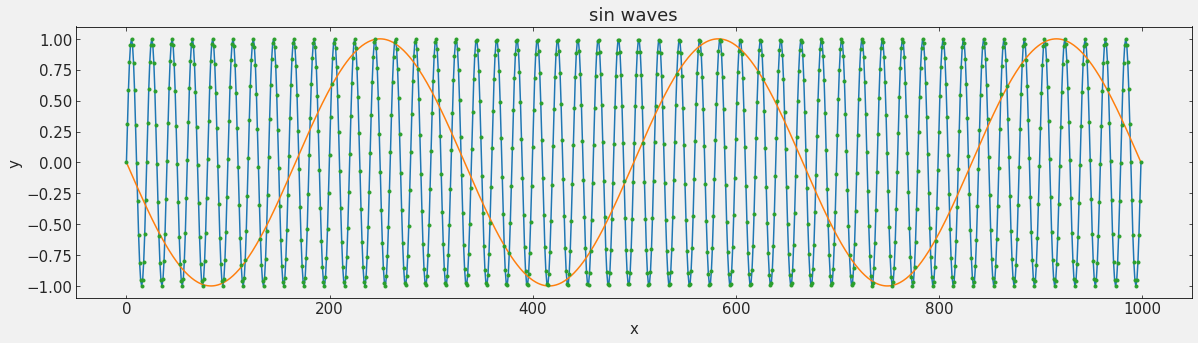

In [361]:
xtmp = np.linspace(-50 * np.pi, 50 * np.pi, 1000)
xtmp2 = np.linspace(-3 * np.pi, 3 * np.pi, 1000)
pl.figure(figsize=(20,5))
pl.plot(np.sin(xtmp))
pl.plot(np.sin(xtmp2))
pl.plot(np.sin(xtmp), '.')
pl.title("sin waves")
pl.xlabel("x")
pl.ylabel("y");

    two sine waves at different frequencies

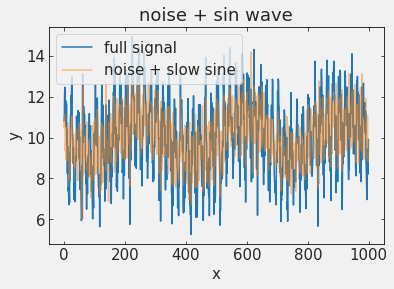

In [353]:
y = y0 + np.sin(xtmp) * 2 + np.sin(xtmp2)
#x = x * np.sin(np.linspace(-10 * np.pi, 10 * np.pi, 1000))
pl.plot(y, label="full signal")
pl.plot(y0 + np.sin(xtmp2), alpha=0.5,  label="noise + slow sine")
pl.title("noise + sin wave")
pl.legend()
pl.xlabel("x")
pl.ylabel("y");

## how does the power spectrum of the fastest sin wave look like

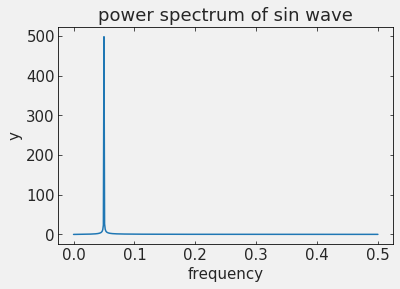

In [354]:
pl.plot(np.fft.rfftfreq(len(y)), np.abs(np.fft.rfft(np.sin(xtmp))))
pl.title("power spectrum of sin wave")
pl.xlabel("frequency")
pl.ylabel("y");

## power spectrum of the full signal 

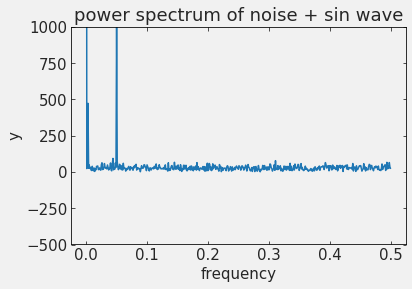

In [355]:
pl.plot(np.fft.rfftfreq(len(y)), np.abs(np.fft.rfft(y)))
pl.title("power spectrum of noise + sin wave")
pl.xlabel("frequency")
pl.ylabel("y");
pl.ylim(pl.ylim()[0], 1000);

there are a few peaks due to noise, and 2 peaks due to the sine waves (at 0.05 and close to 0) and a high value at 0. this is normal when you take the fourier transform numerically: the algorithm has to assume that there are infinite series like that one back to back, and at a freq of 0 the signal will repeat itself

# create a filter to apply in fourier space

In [362]:
s = 0.01
m = 0.05

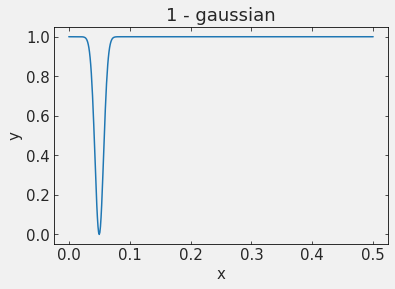

In [363]:
def invgaussian(m, s, x):
    g = -np.exp(-(m-x)**2 / s**2) + 1 
    return g
pl.plot(np.fft.rfftfreq(len(x)), invgaussian(m, s, np.fft.rfftfreq(len(x))));
pl.title("1 - gaussian")
pl.xlabel("x")
pl.ylabel("y");

This filter will multiply the power spectrum. To remove the desired frequency I want the center of the upsidedown gaussian to be centered on the frequency to be removed and I want ot narrow so as to not to affect other frequencies

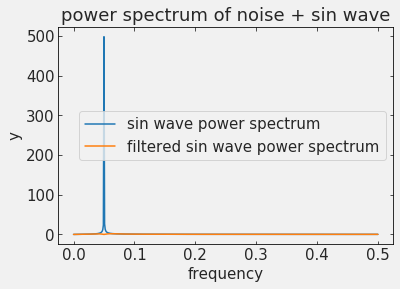

In [364]:
pl.plot(np.fft.rfftfreq(len(y)), np.abs(np.fft.rfft(np.sin(xtmp))), label="sin wave power spectrum")
pl.plot(np.fft.rfftfreq(len(y)), invgaussian(m, s, np.fft.rfftfreq(len(y))) * 
         np.abs(np.fft.rfft(np.sin(xtmp))), label="filtered sin wave power spectrum")
#pl.plot(np.fft.rfftfreq(len(x)), invgaussian(m, s, np.fft.rfftfreq(len(x))));
pl.title("power spectrum of noise + sin wave")
pl.legend()
pl.xlabel("frequency")
pl.ylabel("y");


The frequencies are not perfectly removed, but they are greatly suppressed.

# apply the filter to the power spectrum of the signal

(0, 500)

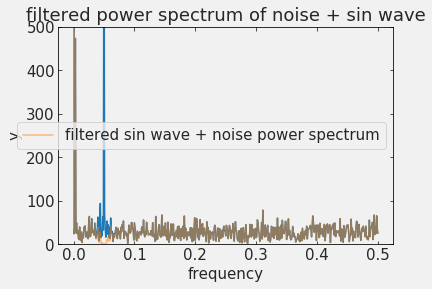

In [365]:
pl.plot(np.fft.rfftfreq(len(y)), np.abs(np.fft.rfft(y)))
newps = invgaussian(m, s, np.fft.rfftfreq(len(y))) * \
        np.abs(np.fft.rfft(y))
pl.plot(np.fft.rfftfreq(len(y)), 
        newps, 
        alpha=0.5, label="filtered sin wave + noise power spectrum")
pl.title("filtered power spectrum of noise + sin wave")
pl.legend()
pl.xlabel("frequency")
pl.ylabel("y");
pl.ylim(0,500)


# invert the power spectrum to get back the clearn time series.

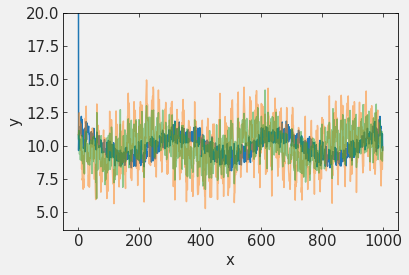

In [366]:
pl.plot(np.fft.irfft(newps), label="filtered")
pl.plot(y, alpha=0.5, label="original")
pl.plot(y0 + np.sin(xtmp2), label="original without sine wave", alpha=0.5)
pl.ylim(pl.ylim()[0],20)
pl.xlabel("x")
pl.ylabel("y");


The frequency is suppressed; noise is also reduced. That is normal because our Gaussian actually suppressed the frequencies around the chosen one as well. Undesired consequences: There is an offset in the phase. I dont understand it so we should thunk about it (I feel its obvious why but its eluding me)